In [1]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [2]:
df = aux.load_data(Path("../results_synced/ratio/"))
df

,dataset,arch,repr,pretrain,fold_number,random_state,batch_size,stride_series,window_length,window_time_stride,...,target_test_acc,target_val_f1,target_test_f1,target_val_auroc,target_test_auroc,pre_val_mse,pre_val_r2,pre_best_model,pre_train_csv,pre_nepochs
0,GunPoint,CNN,DF,False,2,0,128,False,5,1,...,0.495794,0.668577,0.495794,0.680819,0.491237,NaN,NaN,NaN,NaN,NaN
1,GunPoint,CNN,DF,True,2,0,128,False,5,1,...,0.511994,0.663366,0.511994,0.683489,0.457300,0.812175,0.367504,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,59.0
2,GunPoint,CNN,DF,True,2,0,128,False,5,1,...,0.486834,0.633924,0.486834,0.681876,0.496133,1.153903,-0.320485,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,59.0
3,GunPoint,CNN,DF,True,2,0,128,False,5,1,...,0.496471,0.684732,0.496471,0.759735,0.508910,0.605643,0.611806,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,46.0
4,GunPoint,CNN,DF,False,2,0,128,False,5,1,...,0.507592,0.578406,0.507592,0.616573,0.525115,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Chinatown,CNN,DF,True,4,0,128,False,5,1,...,0.644242,0.716497,0.644242,0.790415,0.574099,0.406895,0.745486,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,59.0
221,Chinatown,CNN,DF,True,4,0,128,False,5,1,...,0.599772,0.711609,0.599772,0.777756,0.556404,0.555609,0.537277,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,58.0
222,Chinatown,CNN,DF,True,4,0,128,False,5,1,...,0.626324,0.722200,0.626324,0.776181,0.566689,0.514047,0.698031,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,59.0
223,OSULeaf,CNN,DF,False,1,0,128,True,5,1,...,0.210719,0.271729,0.210719,0.532283,0.525969,NaN,NaN,NaN,NaN,NaN


In [3]:
cols = ['tgt_nepochs', 'pre_nepochs', 'target_val_acc', 'target_val_auroc', 'target_test_acc', 'target_test_auroc']
df.columns

Index(['dataset', 'arch', 'repr', 'pretrain', 'fold_number', 'random_state',
       'batch_size', 'stride_series', 'window_length', 'window_time_stride',
       'window_patt_stride', 'train_events_per_class',
       'train_event_multiplier', 'nevents_train', 'pret_event_multiplier',
       'nevents_pret', 'test_event_multiplier', 'nevents_test',
       'tgt_best_model', 'tgt_train_csv', 'tgt_nepochs', 'target_val_acc',
       'target_test_acc', 'target_val_f1', 'target_test_f1',
       'target_val_auroc', 'target_test_auroc', 'pre_val_mse', 'pre_val_r2',
       'pre_best_model', 'pre_train_csv', 'pre_nepochs'],
      dtype='object')

In [4]:
df.groupby(["dataset", "arch", 'train_events_per_class', 'pret_event_multiplier'])[cols].mean()

tgt_nepochs  \
dataset   arch train_events_per_class pret_event_multiplier                
ArrowHead CNN  8                      0                             43.2   
                                      4                             46.0   
                                      8                             26.0   
                                      16                            57.2   
               16                     0                             78.2   
                                      4                             55.6   
                                      8                             69.0   
CBF       CNN  8                      0                             30.4   
                                      4                             51.6   
                                      8                             45.2   
                                      16                            47.4   
               16                     0                             30.4   
                                      4                             31.8   
                                      8                             35.4   
                                      16                            53.6   
               32                     0                             67.0   
                                      4                             29.4   
                                      8                             11.0   
                                      16                            31.6   
Chinatown CNN  8                      0                             79.0   
                                      4                             77.6   
                                      8                             82.0   
                                      16                            87.0   
               16                     0                             56.4   
                                      4                             57.4   
                                      8                             72.0   
                                      16                            61.0   
               32                     0                             69.0   
                                      4                             85.6   
                                      8                             79.0   
                                      16                            93.6   
GunPoint  CNN  8                      0                             31.8   
                                      4                             84.6   
                                      8                             56.4   
                                      16                            82.4   
               16                     0                             66.4   
                                      4                             78.8   
                                      8                             72.8   
                                      16                            80.6   
               32                     0                             86.6   
                                      4                             78.2   
                                      8                            113.4   
                                      16                            72.0   
OSULeaf   CNN  8                      0                             55.0   
                                      4                             88.0   

                                                             pre_nepochs  \
dataset   arch train_events_per_class pret_event_multiplier                
ArrowHead CNN  8                      0                              NaN   
                                      4                             47.4   
                                      8                             58.0   
                                      16                            55.6   
               16               

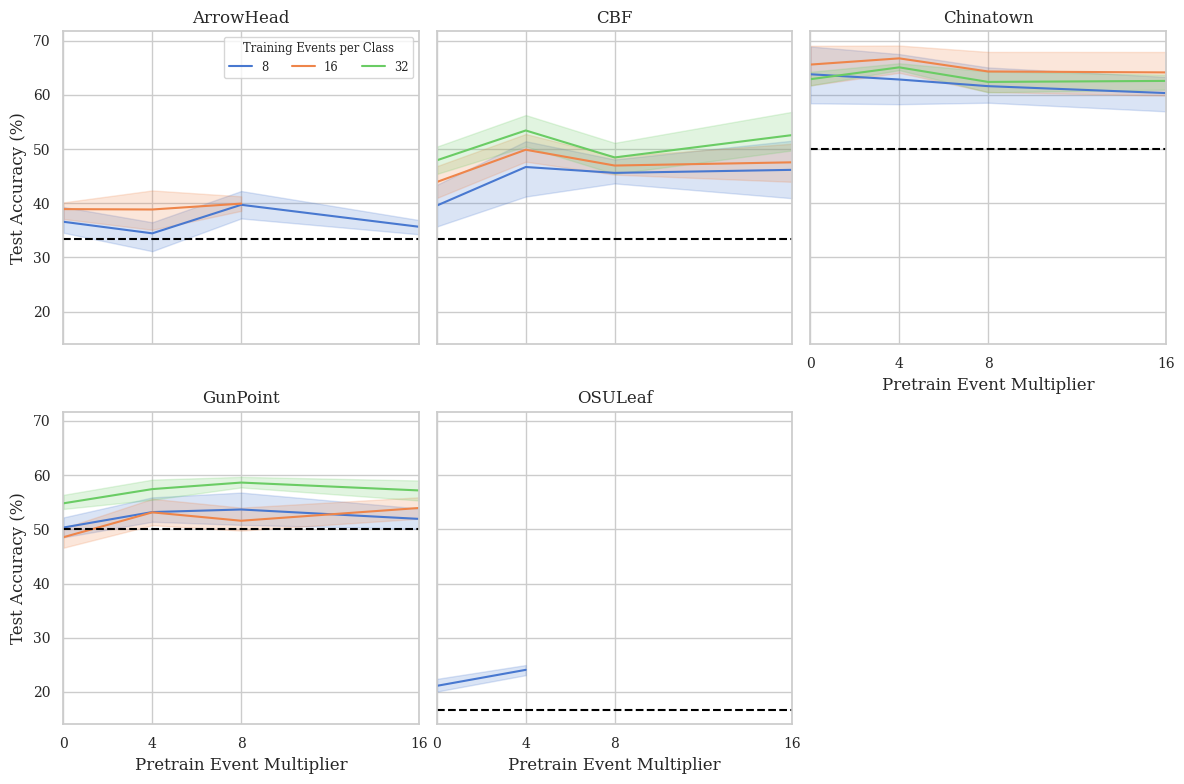

In [6]:
data = df.copy()
data['target_test_acc'] = 100*data["target_test_acc"]
#data['pret_event_multiplier'] = data['pret_event_multiplier'].astype("category")
#data["xd"] = data["pretrained"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
#data["hue"] = data["arch"] + " " + data["xd"]
data.sort_values(["dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
# g = sns.catplot(data=data, x='train_events_per_class', y="target_test_acc", hue='pret_event_multiplier', col="dataset", #row="arch",# hue="pretrained",
#                 kind="bar",  height=4, aspect=1, margin_titles=True, legend=False, legend_out=False, palette="muted", #["blue", "green", "orange", "red"],
#                 errorbar="sd", col_wrap=3, sharex=False, sharey=True, facet_kws={"despine": False, "ylim": (15, 75),
#                 "gridspec_kws": {}});
g = sns.relplot(data=data, x='pret_event_multiplier', y="target_test_acc", hue='train_events_per_class', col="dataset", kind="line", 
                height=4, aspect=1, legend=True, palette="muted", col_wrap=3, markers="True", facet_kws={"despine": False})


g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("")
g.legend.remove()

# Set the x-axis tick labels to be the same for all plots
for ax in g.axes.flat:
    ax.set_xticks([0, 4, 8, 16])
    ax.set_xlim(0,16)

#g.add_legend(adjust_subtitles=True, fontsize="x-small");
for i, nc in enumerate([3, 3, 2, 2, 6]):
    g.facet_axis(0,i).axhline(100/nc, ls="--", color="black");
g.facet_axis(0,0).legend(fontsize="x-small", title="Training Events per Class", title_fontsize="x-small", ncol=3);
plt.savefig("ratio_CNN.pdf")
g.set_xlabels('Pretrain Event Multiplier');

In [8]:
df = aux.load_data(Path("../results_synced/bline/"))
df

,dataset,arch,repr,pretrain,fold_number,random_state,batch_size,stride_series,window_length,window_time_stride,...,nevents_test,tgt_best_model,tgt_train_csv,tgt_nepochs,target_val_acc,target_test_acc,target_val_f1,target_test_f1,target_val_auroc,target_test_auroc
0,GunPoint,RNN,TS,False,3,0,128,True,5,1,...,256,training/2023-03-31_06-49_EXP_wdw_TS_RNN_GunPo...,training/2023-03-31_06-49_EXP_wdw_TS_RNN_GunPo...,105,0.554731,0.501979,0.554731,0.501979,0.581661,0.522207
1,Chinatown,RNN,TS,False,0,0,128,True,5,1,...,256,training/2023-03-31_07-25_EXP_wdw_TS_RNN_China...,training/2023-03-31_07-25_EXP_wdw_TS_RNN_China...,4,0.591446,0.588139,0.591446,0.588139,0.612936,0.625680
2,Chinatown,RNN,TS,False,4,0,128,True,5,1,...,256,training/2023-03-31_07-45_EXP_wdw_TS_RNN_China...,training/2023-03-31_07-45_EXP_wdw_TS_RNN_China...,112,0.627291,0.520202,0.627291,0.520202,0.645355,0.593151
3,CBF,RNN,TS,False,1,0,128,True,5,1,...,384,training/2023-03-31_07-56_EXP_wdw_TS_RNN_CBF_f...,training/2023-03-31_07-56_EXP_wdw_TS_RNN_CBF_f...,11,0.365398,0.388007,0.365398,0.388007,0.517333,0.530529
4,GunPoint,RNN,TS,False,4,0,128,True,5,1,...,256,training/2023-03-31_07-21_EXP_wdw_TS_RNN_GunPo...,training/2023-03-31_07-21_EXP_wdw_TS_RNN_GunPo...,33,0.644071,0.561624,0.644071,0.561624,0.650210,0.543516
5,CBF,RNN,TS,False,0,0,128,True,5,1,...,384,training/2023-03-31_07-53_EXP_wdw_TS_RNN_CBF_f...,training/2023-03-31_07-53_EXP_wdw_TS_RNN_CBF_f...,7,0.339913,0.346600,0.339913,0.346600,0.495336,0.518481
6,GunPoint,RNN,TS,False,0,0,128,True,5,1,...,256,training/2023-03-31_06-02_EXP_wdw_TS_RNN_GunPo...,training/2023-03-31_06-02_EXP_wdw_TS_RNN_GunPo...,0,0.581885,0.548810,0.581885,0.548810,0.569452,0.572699
7,Chinatown,RNN,TS,False,3,0,128,True,5,1,...,256,training/2023-03-31_07-41_EXP_wdw_TS_RNN_China...,training/2023-03-31_07-41_EXP_wdw_TS_RNN_China...,97,0.652546,0.548061,0.652546,0.548061,0.676446,0.623606
8,Chinatown,RNN,TS,False,1,0,128,True,5,1,...,256,training/2023-03-31_07-30_EXP_wdw_TS_RNN_China...,training/2023-03-31_07-30_EXP_wdw_TS_RNN_China...,106,0.638697,0.541544,0.638697,0.541544,0.643020,0.576754
9,GunPoint,RNN,TS,False,1,0,128,True,5,1,...,256,training/2023-03-31_06-13_EXP_wdw_TS_RNN_GunPo...,training/2023-03-31_06-13_EXP_wdw_TS_RNN_GunPo...,60,0.566712,0.548133,0.566712,0.548133,0.570688,0.569687


In [16]:
cols = ['tgt_nepochs', 'target_val_acc', 'target_val_auroc', 'target_test_acc', 'target_test_auroc']
df.groupby(["dataset", "repr", "arch"])[cols].mean()

,,,tgt_nepochs,target_val_acc,target_val_auroc,target_test_acc,target_test_auroc
dataset,repr,arch,,,,,
CBF,TS,RNN,9.0,0.352655,0.506335,0.367304,0.524505
Chinatown,TS,RNN,83.8,0.628269,0.646218,0.550244,0.607753
GunPoint,TS,RNN,56.6,0.578694,0.572855,0.538506,0.548347


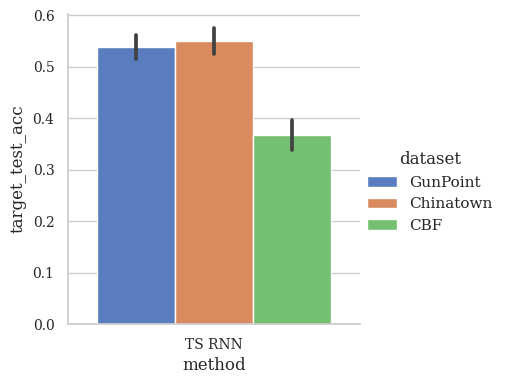

In [22]:
data = df.copy()
data["method"] = data["repr"] + " " + data["arch"]
sns.catplot(data=data, x='method', y="target_test_acc", hue="dataset", kind="bar",  
            height=4, aspect=1, legend=True, legend_out=True, palette="muted",
            errorbar="sd");
plt.savefig("bline_CNN.pdf")